# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [156]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [157]:
from pandas import read_excel


df = read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000, na_values= ['Unknown', 'UNKNOWN', 'NO NAME'])

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [158]:
df.shape

(30000, 15)

In [159]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is one dog license in NYC.

The column `Animal Name` shows the name of the animal.

The column `License Expired Date` shows the date that the license expires.

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

I could ask:

- Which zip code (or by proxy which borough) had the most dog licenses issued?
- What is the most popular breed of dog licensed in the city?
- What are the top 10 most common names for dogs in New York City?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

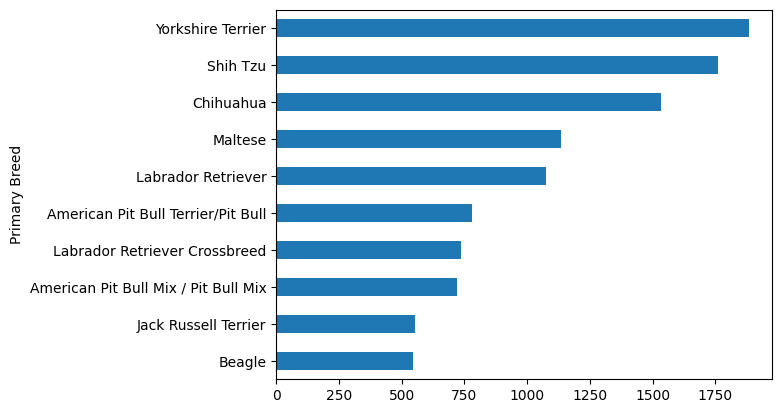

In [160]:
(
    df['Primary Breed'].value_counts()
    .head(10)
    .sort_values()
    .plot(kind='barh')
)

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [161]:
## Oh I did this above already
## I really need to keep up the habit of reading the full homework before I start

## What are the most popular dog names?

In [162]:
df['Animal Name'].value_counts().head(10)

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [163]:
df['Animal Name'].str.contains('Holden').value_counts()
## Nope, no dogs named anything like "Holden"

Animal Name
False    29499
Name: count, dtype: int64

In [164]:
df[df['Animal Name'] == 'Max'].shape
## There are 202 dogs names 'Max'

(202, 15)

In [165]:
df[df['Animal Name'] == 'Maxwell'].shape
## There are 11 dogs names 'Maxwell'

(11, 15)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [166]:
df['Guard or Trained'].value_counts(normalize=True)*100
## 0.08% of dogs are guard dogs

Guard or Trained
No     99.914254
Yes     0.085746
Name: proportion, dtype: float64

## What are the actual numbers?

In [167]:
df['Guard or Trained'].value_counts()
## 17 dogs are guard dogs

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [168]:
df['Guard or Trained'].head(20)
## It seems like a bunch of results might be null values
## Like a bunch...

0      No
1      No
2     NaN
3      No
4     NaN
5     NaN
6     NaN
7      No
8      No
9      No
10     No
11    NaN
12    NaN
13     No
14    NaN
15    NaN
16     No
17     No
18    NaN
19    NaN
Name: Guard or Trained, dtype: object

In [169]:
df['Guard or Trained'].value_counts(dropna=False)
## This shows more than 10,000 NA values

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

In [170]:
df['Guard or Trained'].fillna('No', inplace=True)
df['Guard or Trained'].value_counts()
## Fixed it!!

/var/folders/0c/3z452hlj1pzb2yr_79hcgh8r0000gn/T/ipykernel_36067/591403348.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Guard or Trained'].fillna('No', inplace=True)


Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [171]:
(
    df
    [df['Guard or Trained'] == 'Yes']
    ['Primary Breed']
    .value_counts()
    .head()
)
## The top dog breed is German Shepherd

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [172]:
df['Year'] = df['Animal Birth'].dt.year
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [173]:
df['Age'] = 2025 - df['Year']
df['Age'].median()
## Dogs are approximately 15 years old on average

np.float64(15.0)

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [174]:
df_zipcodes = pd.read_csv('zipcodes-neighborhoods.csv')
df_zipcodes.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [175]:
df = df_zipcodes.merge(df, left_on='zip', right_on='Owner Zip Code')
df.head()

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,White,Tan,Apricot,2010-04-01,Yes,No,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16,2010,15
1,Central Bronx,10453,Bronx,10453,Cici,F,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,RUST,BLACK,2008-11-01,Yes,No,No,2015-02-06 10:35:12.917,2015-02-06,2017-04-28,2008,17
2,Central Bronx,10453,Bronx,10453,Blue,M,Basset Hound,NaN,Brown,Tan,Cream,2005-02-01,Yes,No,No,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2005,20
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,Black,Gray,Tan,2011-02-01,Yes,No,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2011,14
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,WHITE,NaN,NaN,2004-01-01,Yes,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30,2004,21


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [176]:
(
    df[df['neighborhood'].str.contains('Bronx')]['Animal Name']
    .value_counts()
    .head(5)
)

## Most common dog name in the Bronx is a tie between Bella and Rocky

Animal Name
Bella    15
Rocky    15
Max      14
Buddy    12
Lucky    12
Name: count, dtype: int64

In [177]:
(
    df[df['neighborhood'].str.contains('Brooklyn')]['Animal Name']
    .value_counts()
    .head(5)
)

## Most common dog name in Brooklyn is Max

Animal Name
Max        28
Charlie    27
unknown    25
Lucy       22
Rocky      21
Name: count, dtype: int64

In [178]:
(
    df[df['neighborhood'].str.contains('Upper East Side')]['Animal Name']
    .value_counts()
    .head(5)
)

## Most common dog name in the Upper East Side is Charlie

Animal Name
Charlie    19
Bella      12
Lucy       10
Lola       10
Molly       9
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [179]:
(
    df
    .groupby('neighborhood')
    ['Primary Breed']
    .value_counts()
    .groupby(level=0)
    .head(1)
)

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [180]:
df['Animal Dominant Color'] = df['Animal Dominant Color'].str.upper()
df['Animal Secondary Color'] = df['Animal Secondary Color'].str.upper()
df.head()

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,WHITE,TAN,Apricot,2010-04-01,Yes,No,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16,2010,15
1,Central Bronx,10453,Bronx,10453,Cici,F,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,RUST,BLACK,2008-11-01,Yes,No,No,2015-02-06 10:35:12.917,2015-02-06,2017-04-28,2008,17
2,Central Bronx,10453,Bronx,10453,Blue,M,Basset Hound,NaN,BROWN,TAN,Cream,2005-02-01,Yes,No,No,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2005,20
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,BLACK,GRAY,Tan,2011-02-01,Yes,No,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2011,14
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,WHITE,NaN,NaN,2004-01-01,Yes,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30,2004,21


In [181]:
df['Animal Dominant Color'] = df['Animal Dominant Color'].str.replace('GRAY', 'GREY')
df['Animal Secondary Color'] = df['Animal Secondary Color'].str.replace('GRAY', 'GREY')


In [182]:
df['Monochrome'] = (
    df['Animal Dominant Color'].isin(['WHITE', 'BLACK', 'GREY']) &
    (df['Animal Secondary Color'].isin(['WHITE', 'BLACK', 'GREY', 'NONE']) |
     df['Animal Secondary Color'].isna())
)

df.head()

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,...,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,Monochrome
0,Central Bronx,10453,Bronx,10453,T-Bone,M,Bulldog,NaN,WHITE,TAN,...,2010-04-01,Yes,No,Yes,2014-11-16 16:48:08.080,2014-11-16,2016-11-16,2010,15,False
1,Central Bronx,10453,Bronx,10453,Cici,F,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,RUST,...,2008-11-01,Yes,No,No,2015-02-06 10:35:12.917,2015-02-06,2017-04-28,2008,17,False
2,Central Bronx,10453,Bronx,10453,Blue,M,Basset Hound,NaN,BROWN,TAN,...,2005-02-01,Yes,No,No,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2005,20,False
3,Central Bronx,10453,Bronx,10453,Boi,M,Yorkshire Terrier,NaN,BLACK,GREY,...,2011-02-01,Yes,No,Yes,2015-02-10 16:43:24.847,2015-02-10,2017-02-10,2011,14,True
4,Central Bronx,10453,Bronx,10453,MARSHMELLO,F,Samoyed,NaN,WHITE,NaN,...,2004-01-01,Yes,No,Yes,2015-03-27 14:47:53.483,2015-03-27,2017-03-30,2004,21,True


## How many dogs are in each borough? Plot it in a graph.

<Axes: ylabel='borough'>

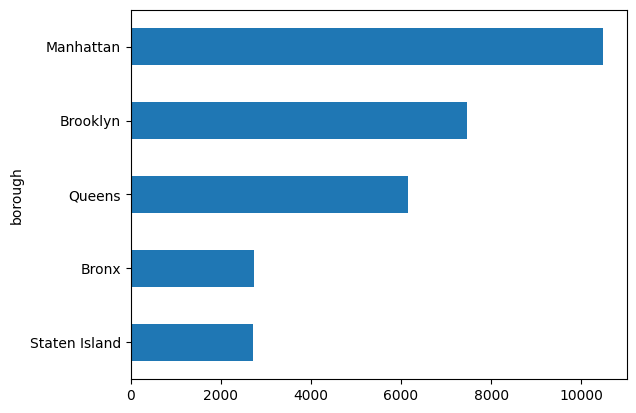

In [183]:
(
    df
    ['borough']
    .value_counts()
    .sort_values()
    .plot(kind='barh')
)

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [184]:
df_pop_boro = pd.read_csv('boro_population.csv')
df_pop_boro.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [185]:
df = df_pop_boro.merge(df, left_on='borough', right_on='borough')
df.head()

,borough,population,area_sqmi,neighborhood,zip,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,...,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,Monochrome
0,Manhattan,1644518,23,Central Harlem,10026,10026,OREO MARIN,F,Havanese,NaN,...,2005-09-01,Yes,No,Yes,2014-09-24 11:00:58.667,2014-09-24,2017-05-21,2005,20,True
1,Manhattan,1644518,23,Central Harlem,10026,10026,Jake Isbell,M,Puggle,NaN,...,2013-10-01,Yes,No,Yes,2014-10-01 22:16:25.653,2014-10-01,2017-10-01,2013,12,False
2,Manhattan,1644518,23,Central Harlem,10026,10026,OLIVIA,F,Havanese,NaN,...,2008-03-01,Yes,No,Yes,2014-10-11 15:08:12.983,2014-10-11,2017-08-19,2008,17,False
3,Manhattan,1644518,23,Central Harlem,10026,10026,Henry,M,NaN,Hound Mix,...,2007-07-01,Yes,No,Yes,2014-11-01 13:52:57.347,2014-11-01,2016-11-01,2007,18,True
4,Manhattan,1644518,23,Central Harlem,10026,10026,Milo,M,Yorkshire Terrier,NaN,...,2011-06-01,Yes,No,Yes,2014-11-04 21:11:14.157,2014-11-04,2016-11-04,2011,14,False


In [186]:
(
    df['borough']
    .value_counts()
    /
    df
    .groupby('borough')
    ['population'].first()
)

## This shows the number of dogs per-person, but I feel like it's not super easily interpretable

borough
Bronx            0.001888
Brooklyn         0.002832
Manhattan        0.006371
Queens           0.002631
Staten Island    0.005746
dtype: float64

In [187]:
(
    df['borough']
    .value_counts()
    /
    df
    .groupby('borough')
    ['population'].first()
    *1000
)

## The below result is dogs-per-1,000-people, which i feel like is more human-readable

borough
Bronx            1.888084
Brooklyn         2.831532
Manhattan        6.371472
Queens           2.630870
Staten Island    5.746400
dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

<Axes: ylabel='borough,Primary Breed'>

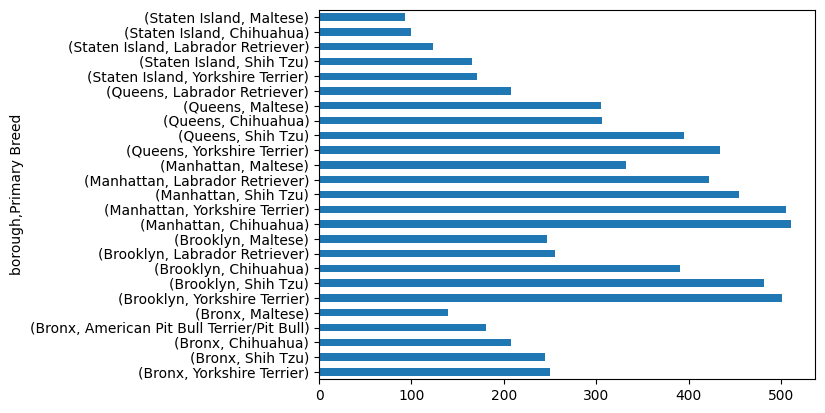

In [203]:
## My first attempt, sans-ChatGPT (I don't love the result)

(
    df.groupby('borough')
    ['Primary Breed']
    .value_counts()
    .groupby(level=0)
    .head(5)
    .plot(kind='barh')
)

**My ChatGPT Convo for Attempt #2: [Here](https://chatgpt.com/share/6922ab92-bf64-8003-b7b1-0350db26e048)**

<Axes: ylabel='borough'>

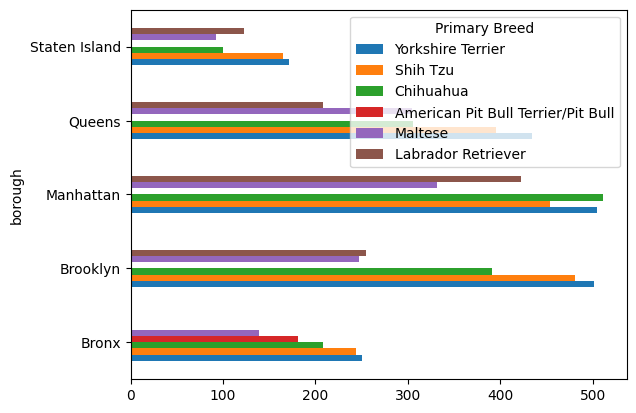

In [204]:
(
    df
    .groupby('borough')
    ['Primary Breed']
    .value_counts()
    .groupby(level=0)
    .head(5)
    .unstack(level=1)
    .plot(kind='barh')
)